# HEP Plotter Gallery (2D) with arrays!
Below are a collection of simple examples that demonstrate the capabilities of hepPlotter.  
This package is only meant to improve style and reduce time needed to make publication quality figures for HEP.  
Where possible, the API for matplotlib is used directly (the default options are modified to better suit HEP plots).  However, the user should still retain enough control to modify plots as needed.

### HEP Plotter Backend
In the hepPlotter framework, ROOT data can be accessed using either c++ `ROOT` or `uproot`.  
Either backend can be used to make plots with arrays.

First, ensure the environment has the proper path for this setup.   Nominally this would be used inside a CMSSW environment, so the import statements will vary.

In [1]:
import os
import sys

In [2]:
cwd = os.getcwd()
hpd = cwd.rstrip("examples")+"python/"
if hpd not in sys.path:
    sys.path.insert(0,hpd)
    print("Added {0} to path!".format(hpd))
else:
    print("Already exists in path!")

Added /Users/demarley/Desktop/Home/hepex/hepPlotter/python/ to path!


## Two dimensional Histograms
HEP plotter is designed to accept ROOT histograms (TH1 or TEfficiency) and then plot in a HEP-friendly format using matplotlib.  It is also possible to pass un-binned data directly (e.g., a numpy array) and a unique histogram will be generated.  However, by using histograms directly, HEP users can manipulate histograms using familiar analysis techniques before plotting them.

In [3]:
import numpy as np
from histogram2D import Histogram2D
%matplotlib inline

/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/style/core.py:51: UserWarning: Style includes a parameter, 'backend', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))


In [4]:
# Generate some pseudo-data (matches the histograms stored in example root file)
bins  = range(21)
n     = 10000
mu    = 5
sigma = 1

gauss   = np.random.normal(mu,sigma, n)
poisson = np.random.poisson(mu, n)

print(" Gauss:   {0}".format(gauss))
print(" Poisson: {0}".format(poisson))

 Gauss:   [5.57374038 4.8275168  5.54340436 ... 5.28968957 3.79325007 5.96573074]
 Poisson: [3 6 4 ... 1 2 1]


/Users/demarley/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


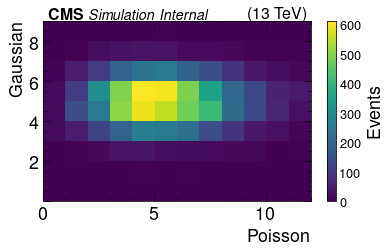

In [5]:
# Setup the plot (define some global settings)
hist = Histogram2D()

hist.backend = 'uproot'   # use either 'uproot' or 'ROOT' backend; I prefer 'uproot' to avoid loading c++ ROOT
hist.x_label = "Poisson"
hist.y_label = "Gaussian"
hist.saveAs  = "hist2d_jupyter_example"
hist.CMSlabel = 'outer'
hist.CMSlabelStatus = "Simulation Internal"
hist.binning = [range(13),range(10)]
hist.logplot['data'] = False

# Set properties unique to 2D histogram
hist.colormap = 'viridis'          # options are defined in `setColormap()` of histogram2D.py
hist.colorbar['title'] = "Events"  # text label for colorbar

hist.initialize()   # sets the parameters of the plot

# Add 'possion' data to the plot from sample1
hist.Add([poisson,gauss],name="poisson_gauss") # can change colorbar range with args: vmin=M,vmax=N

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it

### Re-bin the histogram using binned data
Now we will bin the histogram using numpy and pass the data to hepPlotter (to emulate a scenario where the user may already have binned data and want to re-bin it for plotting purposes.)

In [6]:
# Make the 'dummy' histogram data
binning    = [ [1,3,5,9,13], [2,4,6,8]]
data,bx,by = np.histogram2d(poisson,gauss,bins=binning)

In [7]:
# use built-in functions for creating the 'bin values' for the data
# so that the weights (the bin content from the histogram) go to the correct bin
import tools
xpseudo,ypseudo = tools.dummy_bins2D(tools.midpoints(bx),tools.midpoints(by))

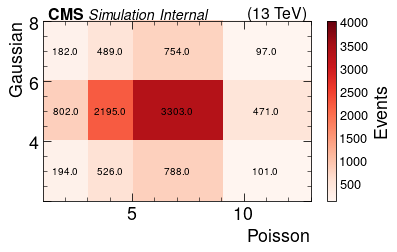

In [8]:
# Setup the plot (define some global settings)
hist = Histogram2D()

hist.backend = 'uproot'   # use either 'uproot' or 'ROOT' backend; I prefer 'uproot' to avoid loading c++ ROOT
hist.x_label = "Poisson"
hist.y_label = "Gaussian"
hist.saveAs  = "hist2d_jupyter_example"
hist.CMSlabel = 'outer'
hist.CMSlabelStatus = "Simulation Internal"
hist.binning = binning
#hist.rebin   = {'x':binning[0],'y':binning[1]}
hist.logplot['data'] = False

# Set properties unique to 2D histogram
hist.colormap = 'Reds'             # options are defined in `setColormap()` of histogram2D.py
hist.colorbar['title'] = "Events"  # text label for colorbar
hist.write_bin_yields  = True      # Add data values to the bins!

hist.initialize()   # sets the parameters of the plot

# Pass the flatten() data to the module
hist.Add([xpseudo.flatten(),ypseudo.flatten()],name="poisson_gauss",
         weights=data.flatten(),vmax=4000) # change vmax of the colorbar so it isn't so dark for the text

p = hist.execute() # make the plot (p represents the matplotlib 'figure' object)
#hist.savefig()     # save the figure (with name "hist.saveAs+hist.format") and close it